# This notebook is to demonstrate linear regression using vectorization

This is the enhanced solution of the simple linear regression notebook
1. Using vectorization to speed up the process
2. This method applies to general linear regression with multiple variates 
3. This method still uses stochastic solution to work on online data

In [1]:
#get data from https://github.com/joelgrus/data-science-from-scratch/blob/master/code-python3/simple_linear_regression.py
import random
import numpy as np
num_friends_good = [49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes_good = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]


In [2]:
data = np.array(list(zip(num_friends_good, daily_minutes_good)))

In [3]:
data[0,0]
print(data.ndim)
print(data.shape)

2
(203, 2)


In [4]:
#randomize the the order of data
#np.random.shuffle(data)

In [5]:
data[0:3,:]

array([[ 49.  ,  68.77],
       [ 41.  ,  51.25],
       [ 40.  ,  52.08]])

In [6]:
#add a column of ones to the data set as x_0
ones = np.ones((data.shape[0],1))
ones.shape
data = np.concatenate((ones,data),axis=1)
#print(data)

In [7]:
data[0:3,:]

array([[  1.  ,  49.  ,  68.77],
       [  1.  ,  41.  ,  51.25],
       [  1.  ,  40.  ,  52.08]])

In [8]:
random.seed(10) #seed random generator so we can get the same random number very time for debugging
#create two non-zero random initial values for alpha and beta
theta = np.array([random.random(), random.random()])
initial_alpha = 0.0001
alpha = initial_alpha #initial alpha
min_theta, min_cost = None, float("inf")
iterations_with_no_improvement = 0

In [9]:
#use a timer to see how much time it takes for the program to converge
#stochastic solution - the efficient way 
import time
start_time = time.time()

#in the vectorizated solution
#x_i is data[:,1]
#y_i is data[:,2]
#difference of y and predicted y for data point 3 is 
#data[3,2] - data[3,0:2]*theta  
#the shape of data[3,0:2] is 1X2 and theta is 2X1, the product is 1x1

while iterations_with_no_improvement < 100:
    
    #the cost is the SSE that we want to minimize
    cost = sum((data[:,2] - np.dot(data[:,0:2],theta))**2)
    #print(cost)
    #print(theta)
       
    #if there is an improvement
    if cost < min_cost:
        #reassign the minimum theta and cost to the new values
        min_theta, min_cost = theta, cost
        #set it back to 0 
        iterations_with_no_improvement = 0 
        #set the learning rate back to the max greedy rate
        alpha = initial_alpha
        
    
    # if there is no improvement
    else:
        # try a less greedy learning rate up to 100 times
        alpha *=0.9
        # incremenet the counter
        iterations_with_no_improvement +=1
    
    # iterate through all the data points in the randomized data set
    #for x_i, y_i in in_np.random.shuffle(data):
    np.random.shuffle(data)
    for i in range(data.shape[0]):
        # update theta
        error = data[i,2]-data[i,0:2].dot(theta)
        
        #delta_weight = -2*alpha*gradient 
        #pay close attention to the + sign here
        #the gradient is -error and -error*x, so the negative signs cancel out
        theta = [theta[0]+2*alpha*error, theta[1]+2*alpha*error*data[i,1]]
        #print(theta)

print(min_theta)
print(time.time()-start_time)

[22.95063040847867, 0.90360764923191816]
0.9271175861358643


In [10]:
#Now, let's try the batch solution
import time
start_time = time.time()
while iterations_with_no_improvement < 100:
    
    #the cost is the SSE that we want to minimize
    cost = sum((data[:,2] - np.dot(data[:,0:2],theta))**2)
    #print(cost)
    #print(theta)
       
    #if there is an improvement
    if cost < min_cost:
        #reassign the minimum theta and cost to the new values
        min_theta, min_cost = theta, cost
        #set it back to 0 
        iterations_with_no_improvement = 0 
        #set the learning rate back to the max greedy rate
        alpha = initial_alpha
        
    
    # if there is no improvement
    else:
        # try a less greedy learning rate up to 100 times
        alpha *=0.9
        # incremenet the counter
        iterations_with_no_improvement +=1
    
    # iterate through all the data points in the randomized data set
    #for x_i, y_i in in_np.random.shuffle(data):
    # We don't need to shuffle data any more
    #np.random.shuffle(data)
    
    #the loop is to calculate the gradients
    error = 0
    error_xi = 0
    for i in range(data.shape[0]):
        # the difference is here
        # theta is updated after each data point
        # it is updated as all the data point's contribution is accumulated
        # and then there is only one update on theta
        error += data[i,2]-data[i,0:2].dot(theta)
        error_xi += (data[i,2]-data[i,0:2].dot(theta))*data[i,1]
    
    #sicne theta is updated only once, it's done after the loop
    theta = [theta[0]+2*alpha*error, theta[1]+2*alpha*error_xi]
        #print(theta)
# we can see that the batch method generated the same result
# but which one is more efficient? 
# the stochasitc solution is more efficience
# and since we shuffle the data set in the stochastic solution, we can have difference start point each time
# the stochastic method are less subject to local minimum 
print(min_theta)
print(time.time()-start_time)

#use time to see that stochastic method only takes 1/3 of the time
#imagine we deal with a large data set and how much time can be saved
#you can also play with the iteration numbers to see the difference

[22.95063040847867, 0.90360764923191816]
0.0005002021789550781


In [11]:
#now let's try Scikit-learn
from sklearn import linear_model

In [12]:
#the input X in sklearn linear model is a matrix
#we need to convert the vector to a nx1 matrix
print(data[:,1].shape)
data1=np.reshape(data[:,1],(data.shape[0],1))
print(data1.shape)

(203,)
(203, 1)


In [13]:
#we can see that the available library is very efficent
start_time = time.time()
data1=np.reshape(data[:,1],(data.shape[0],1))
model = linear_model.LinearRegression()
model.fit(data1, data[:,2])
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)
print(time.time()-start_time)

Intercept: 
 22.9475524135
Coefficients: 
 [ 0.90386595]
0.005000591278076172


In [14]:
2*alpha*data[3,0:2].dot(theta)

1.6509046910627334e-07

In [15]:
#now, let's plot the predicted model
import matplotlib.pyplot as plt
%matplotlib inline

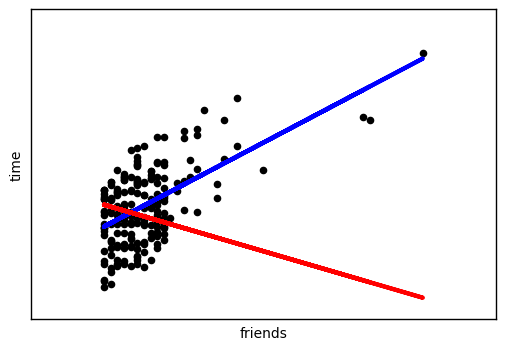

In [18]:
# Plot outputs
plt.scatter(data1, data[:,2],  color='black')
#the output is a line by default
plt.plot(data1, model.predict(data1), color='blue',
         linewidth=3)
plt.plot(data1, -0.5*data1+30, color='red',
         linewidth=3)

plt.xlabel('friends')
plt.ylabel('time')
plt.grid(True)
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
2*alpha*data[3,0:2]

In [97]:
theta

[0.44257775882280087, -0.035399443537212784]

In [98]:
data[3,0:2]

array([ 1.,  2.])

In [100]:
data[3,0:2].dot(theta)

0.37177887174837532

In [102]:
data[3,2]

20.420000000000002

In [27]:
data[:,1].shape

(203,)

In [30]:
data[:,2].shape

(203,)

In [31]:
data1=np.reshape(data[:,1],(data.shape[0],1))

In [32]:
data1.shape

(203, 1)